In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
# Loading dataset
dataset = pd.read_csv('Adidas Vs Nike.csv')

In [4]:
# Inspecting the dataset
dataset.shape

(3268, 10)

In [5]:
dataset.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [7]:
# After checking the types of data I noticed the listing price and sale price are not in the right format of amount. To get the correct format of amount, I divided the listing price and sale price column by 100.

In [8]:
dataset[['Listing Price', 'Sale Price']]=dataset[['Listing Price' , 'Sale Price']].apply(lambda x: x/100)

In [9]:
dataset.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,149.99,74.99,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,75.99,37.99,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,9.99,5.99,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,69.99,34.99,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,79.99,39.99,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [10]:
dataset.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,68.680202,61.342656,26.875765,3.242105,40.551714
std,47.246594,42.932476,22.633487,1.428856,31.543491
min,0.000000,4.490000,0.000000,0.000000,0.000000
25%,42.990000,29.990000,0.000000,2.600000,10.000000
50%,59.990000,47.990000,40.000000,3.500000,37.000000
75%,89.990000,79.950000,50.000000,4.400000,68.000000
max,299.990000,365.000000,60.000000,5.000000,223.000000


In [11]:
# From the statisitcs of the data, the mean sale price is 61.34 and the median 47.99, with the minimum and maximum sale price to be 4.49 and 365.0 respectively. The average discount is 26.87, also the ratings is between 0-5 scale, zero being the bad rating or NO rating and five being the best rating. Observing the distribution of the Sale Price and Listing Price, the Prices tends to be Right-Skewed distribution, with the sale price more normally distributed than the listing Price.

In [12]:
# Observing the distribution of the Sale Price and Listing Price, the Prices tends to be Right-Skewed distribution, with the sale price more normally distributed than the listing Price.

In [13]:
dataset['Brand'].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [14]:
# To further understand the data I used the unique function to identify the distinct elements in the brand array. Looking closely I noticed there is repetition of word 'adidas' in the brand name. To get a meaningful data, I replaced the repetition element with the right one.

In [15]:
dataset=dataset.replace('Adidas Adidas ORIGINALS', 'Adidas ORIGINALS')

In [16]:
dataset['Brand'].unique()

array(['Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [17]:
# Checking for null values in the dataset
print(dataset.isnull().sum())

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64


In [18]:
# The above code is to check for the missing value, it shows that, there are no missing values, but three rows of strings are missing the Description column. This is not a major concern in the analysis so we ignore the missing string. The total rows and cloumns contained in the data is 3628 rows and 10 columns respectively.

In [19]:
# Checking for duplicate values in the dataset
dataset.duplicated().sum()

0

In [20]:
brand_counts = dataset['Brand'].value_counts(ascending=False)
print(brand_counts)

Adidas CORE / NEO           1111
Adidas ORIGINALS             908
Nike                         643
Adidas SPORT PERFORMANCE     606
Name: Brand, dtype: int64


In [21]:
# The value counts above for the brands shows that the Adidas Core/Neo has the highest sales of 1111. The Nike brands sold was 643 while the Adidas sport performance has least sale of 606.

<Axes: xlabel='Brand'>

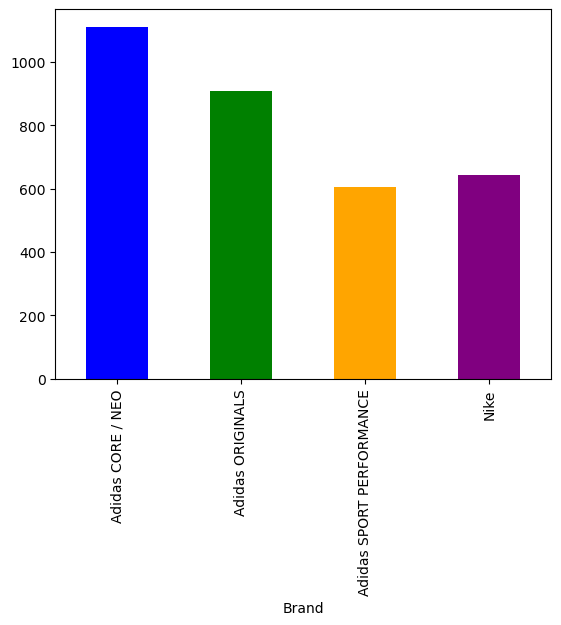

In [22]:
colors = ['blue', 'green', 'orange', 'purple']
dataset.groupby('Brand')['Product Name'].count().plot.bar(color=colors)

In [23]:
Sale_Price_Stat = dataset.groupby('Brand')['Sale Price'].describe()
Sale_Price_Stat

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Adidas CORE / NEO,1111.0,31.162124,13.112195,4.49,22.9900,27.99,37.99,79.99
Adidas ORIGINALS,908.0,68.124361,37.335580,22.99,43.7475,59.99,79.99,299.99
Adidas SPORT PERFORMANCE,606.0,63.227426,43.273065,12.49,29.9900,48.99,79.99,279.99
Nike,643.0,102.136765,45.132895,15.95,69.9500,95.97,127.97,365.00


In [24]:
# Nike has the highest average price of 102.13 as seen above, while Adidas Core/Neo brand has the least average price of $31.16.

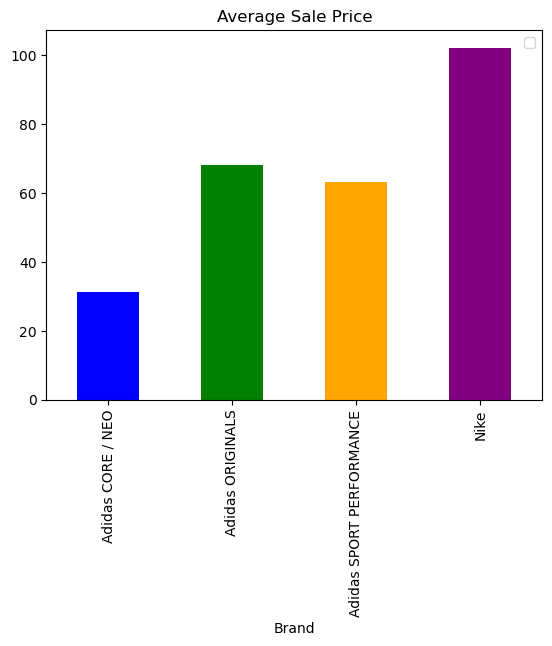

In [25]:
# Define the colors you want to use
colors = ['blue', 'green', 'orange', 'purple']

# Assuming you have Sale_Price_Stat as a DataFrame
Sale_Price_Avg = Sale_Price_Stat.plot(kind='bar', y='mean', title='Average Sale Price', color=colors)
plt.legend(labels=[])

# Show the plot
plt.show()

In [26]:
# On the other hand the relationship of the Sale Price to counts of brands clears more point that, more Adidas tends to have more the Adidas CORE/Neo brand because of its lesser price.

In [27]:
ratings_desc = dataset.groupby('Brand')['Rating'].describe()
ratings_desc

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Adidas CORE / NEO,1111.0,3.412331,1.141266,0.0,2.7,3.5,4.3,5.0
Adidas ORIGINALS,908.0,3.323568,1.187446,0.0,2.6,3.5,4.2,5.0
Adidas SPORT PERFORMANCE,606.0,3.346205,1.150757,0.0,2.6,3.4,4.3,5.0
Nike,643.0,2.734837,2.137756,0.0,0.0,3.8,4.6,5.0


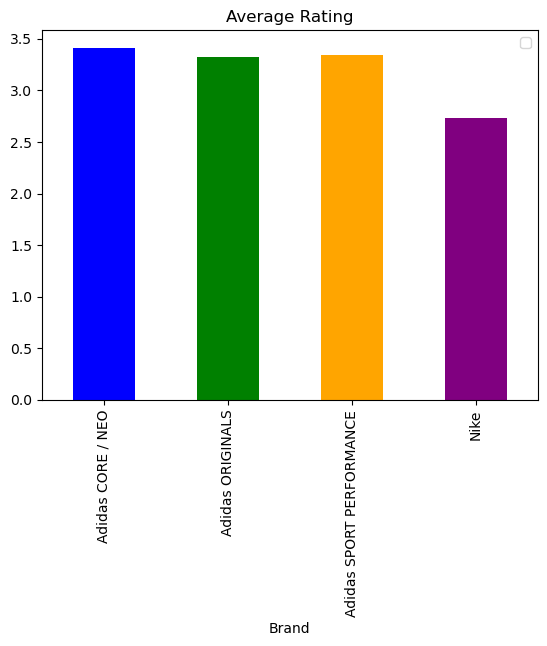

In [28]:
# Define the colors you want to use
colors = ['blue', 'green', 'orange', 'purple']

# Assuming you have Sale_Price_Stat as a DataFrame
ratings_desc.plot(kind='bar', y='mean', title='Average Rating', color=colors)
plt.legend(labels=[])

# Show the plot
plt.show()

In [29]:
# The results shows that the Adidas Core/Neo brands has the highest average ratings, which implies that more ratings came from the customers who bought the Adidas CORE/NEO brand

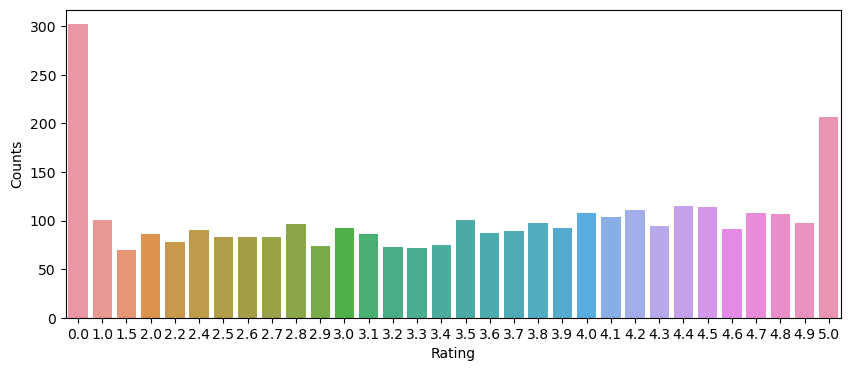

In [30]:
Rating_Dist = dataset.Rating.value_counts()

plt.figure(figsize=(10, 4))

sns.barplot(x=Rating_Dist.index, y=Rating_Dist.values)

plt.xlabel('Rating')

plt.ylabel('Counts')

plt.show()

In [31]:
# It tends to be that, about 300 customers gave a zero rating which I consider a NO rating, while about 230 customers gave a rating of 5 as seen from the plot about.

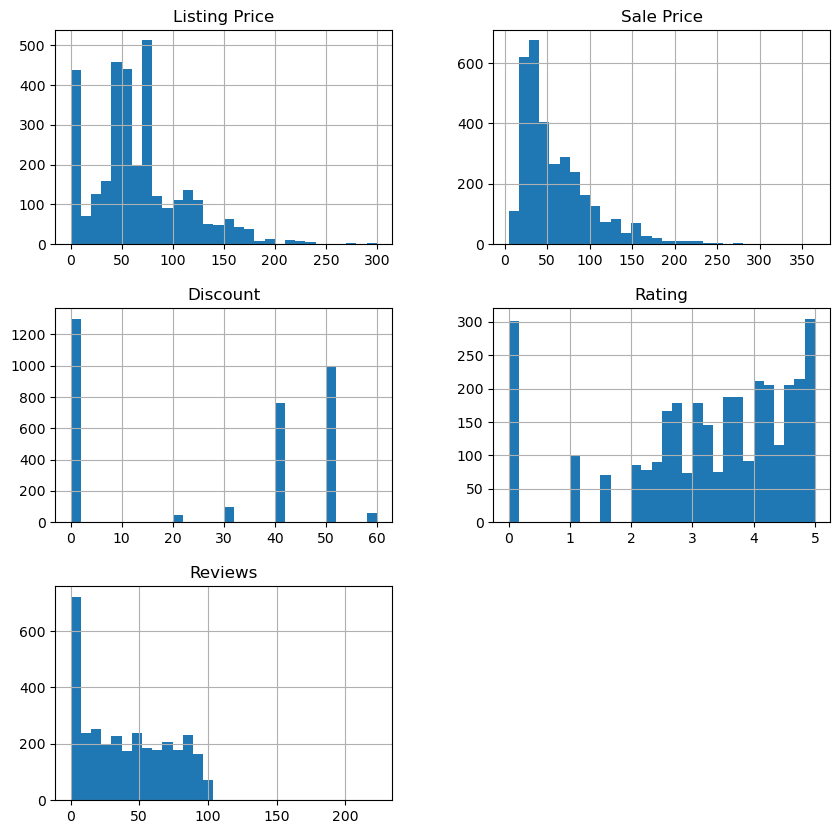

In [32]:
# Generate histogram for all the numerical columns in the dataset
plt.rcParams['figure.figsize'] = (10, 10)
dataset.hist(bins=30)
plt.show()

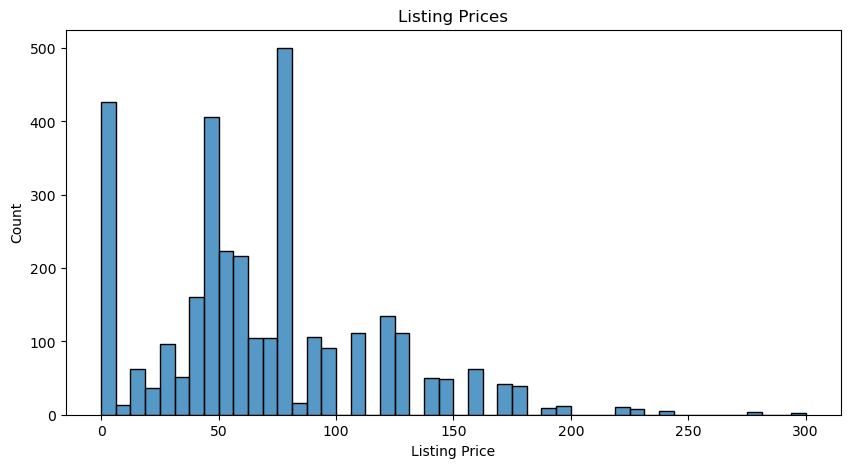

In [33]:
plt.figure(figsize=(10,5))
plt.title("Listing Prices")
sns.histplot(x="Listing Price", data=dataset)
plt.show()

In [34]:
#To check the listing price 0 products in Nike
dataset[dataset['Listing Price']==0]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0.0,74.95,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,2020-04-13T15:27:56
2626,Nike Air Force 1 '07,CT4328-101,0.0,74.95,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,2020-04-13T15:27:56
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0.0,99.95,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,2020-04-13T15:27:56
2628,Nike Air Max Dia SE,CD0479-200,0.0,99.95,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,2020-04-13T15:27:57
2629,Nike Air Max Verona,CZ6156-101,0.0,99.95,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,2020-04-13T15:27:57
...,...,...,...,...,...,...,...,...,...,...
3257,Air Jordan 5 Retro,CD2722-001,0.0,159.95,0,Nike,The Air Jordan 5 Retro for women gives a colou...,3.3,3,2020-04-13T15:39:07
3258,Nike ZoomX Vaporfly NEXT%,AO4568-600,0.0,199.95,0,Nike,The Nike ZoomX Vaporfly NEXT% clears your path...,4.7,45,2020-04-13T15:39:08
3260,Nike Tiempo Legend 8 Academy TF,AT6100-606,0.0,64.95,0,Nike,The Nike Tiempo Legend 8 Academy TF takes the ...,0.0,0,2020-04-13T15:40:51
3262,Nike React Metcon AMP,CT9155-063,0.0,139.95,0,Nike,The Nike React Metcon AMP takes the stability ...,3.0,1,2020-04-13T15:40:58


In [35]:
# A lot of NIKE Products have no reviews which have also no Listing_Price and no Rating. On the other hand, other products of NIKE get high rating compared to adidas products. It seems that there is big gap between fans and those who are not in NIKE.

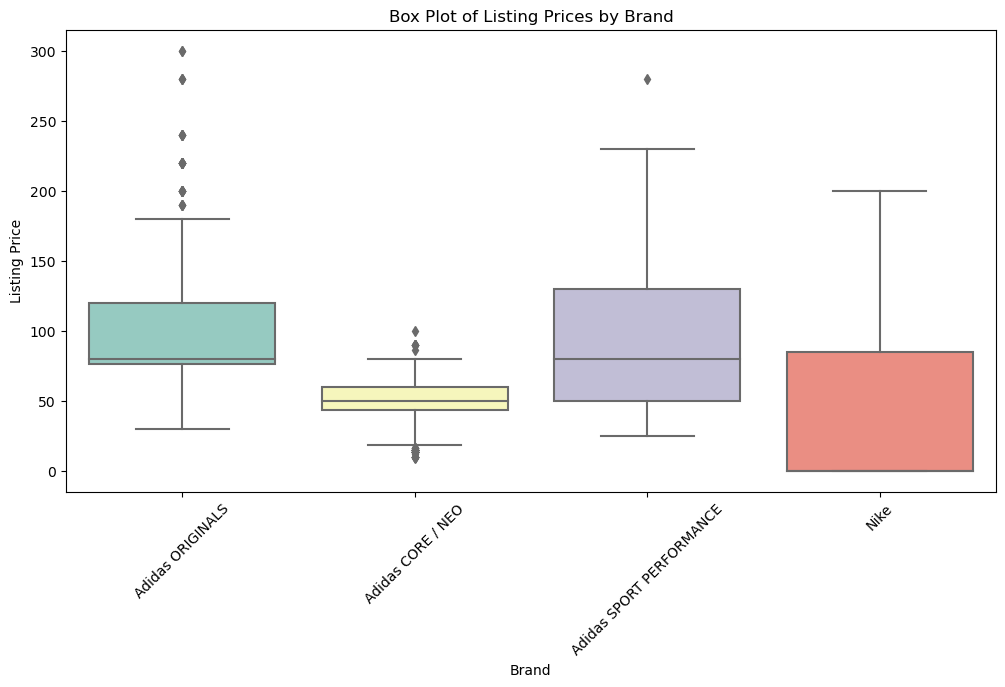

In [36]:
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(x="Brand", y="Listing Price", data=dataset, palette="Set3")

# Set labels and title
plt.xlabel("Brand")
plt.ylabel("Listing Price")
plt.title("Box Plot of Listing Prices by Brand")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [37]:
# Removing outliers from the Listing Price
column = 'Listing Price'

# Calculating IQR
Q1 = dataset['Listing Price'].quantile(0.25)
Q3 = dataset['Listing Price'].quantile(0.75)
IQR = Q3 - Q1

# Defining Outlier Threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing Outliers
cleaned_dataset = dataset[(dataset['Listing Price'] >= lower_bound) & (dataset['Listing Price'] <= upper_bound)]

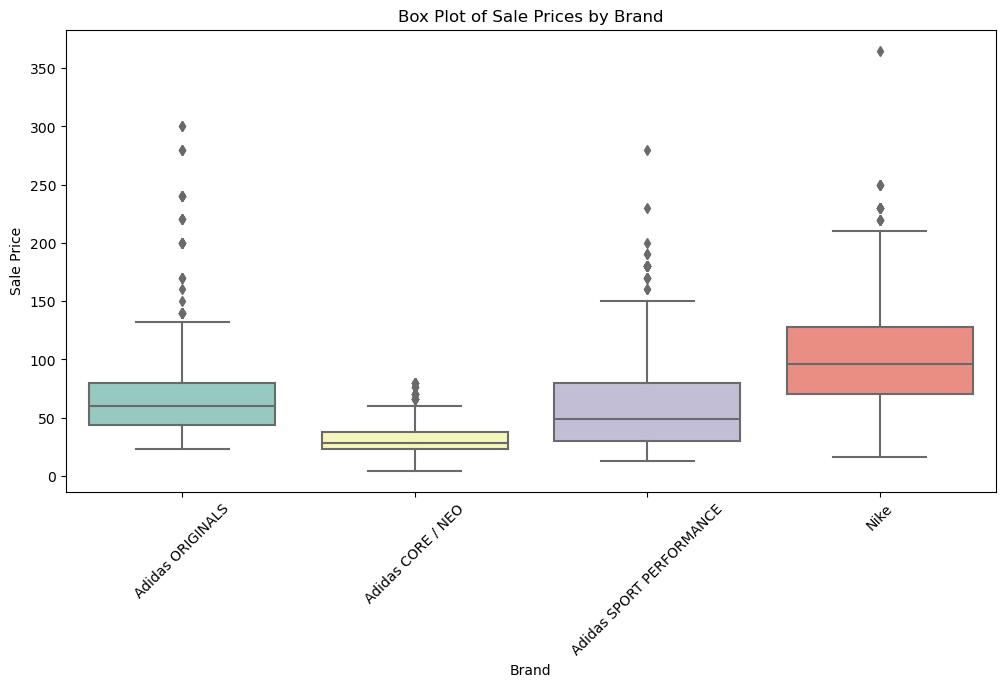

In [38]:
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(x="Brand", y="Sale Price", data=dataset, palette="Set3")

# Set labels and title
plt.xlabel("Brand")
plt.ylabel("Sale Price")
plt.title("Box Plot of Sale Prices by Brand")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [39]:
# Removing outliers from the Sale Price
column = 'Sale Price'

# Calculating IQR
Q1 = dataset['Sale Price'].quantile(0.25)
Q3 = dataset['Sale Price'].quantile(0.75)
IQR = Q3 - Q1

# Defining Outlier Threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing Outliers
cleaned_dataset = dataset[(dataset['Sale Price'] >= lower_bound) & (dataset['Sale Price'] <= upper_bound)]

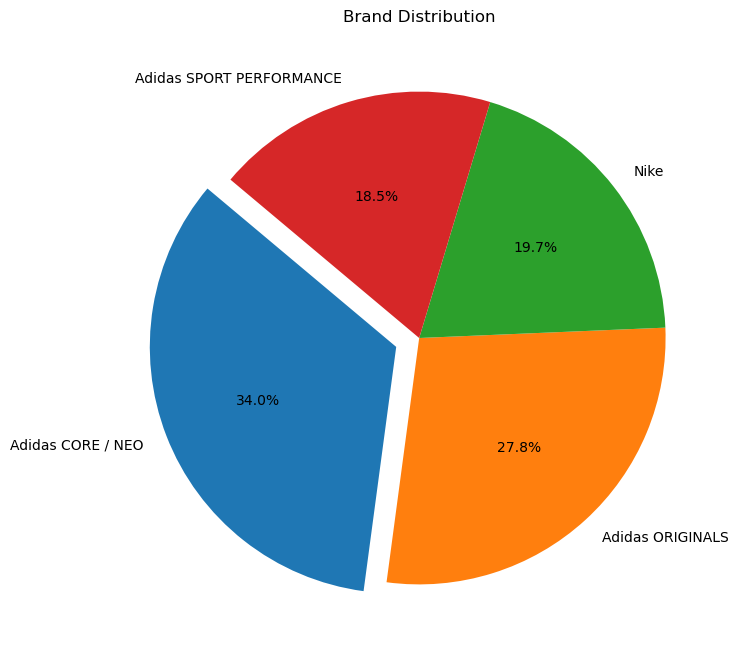

In [40]:
# Calculate the distribution of brands
brand_counts = dataset['Brand'].value_counts()

# Set the figure size and explode a slice (optional)
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0)  # You can adjust this to highlight a particular brand, if needed.

# Create the pie chart
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)

# Add a title
plt.title('Brand Distribution')

# Show the plot
plt.show()

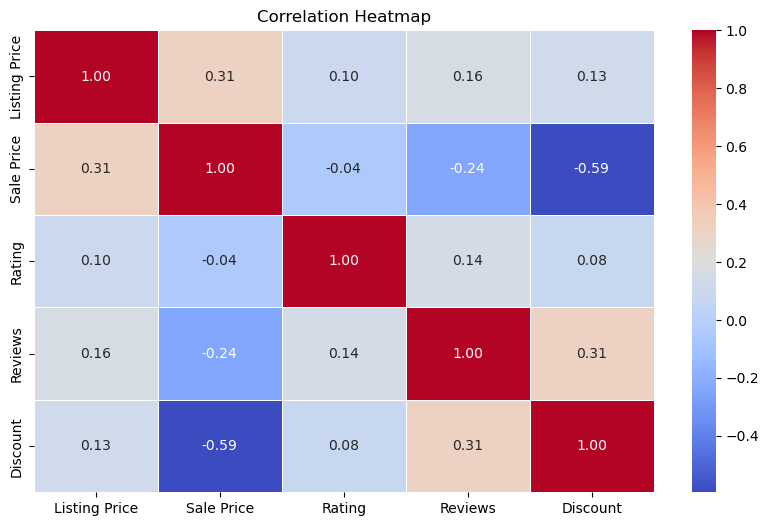

In [41]:
# Select numerical columns for correlation analysis
numerical_columns = dataset[['Listing Price', 'Sale Price', 'Rating', 'Reviews', 'Discount']]

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

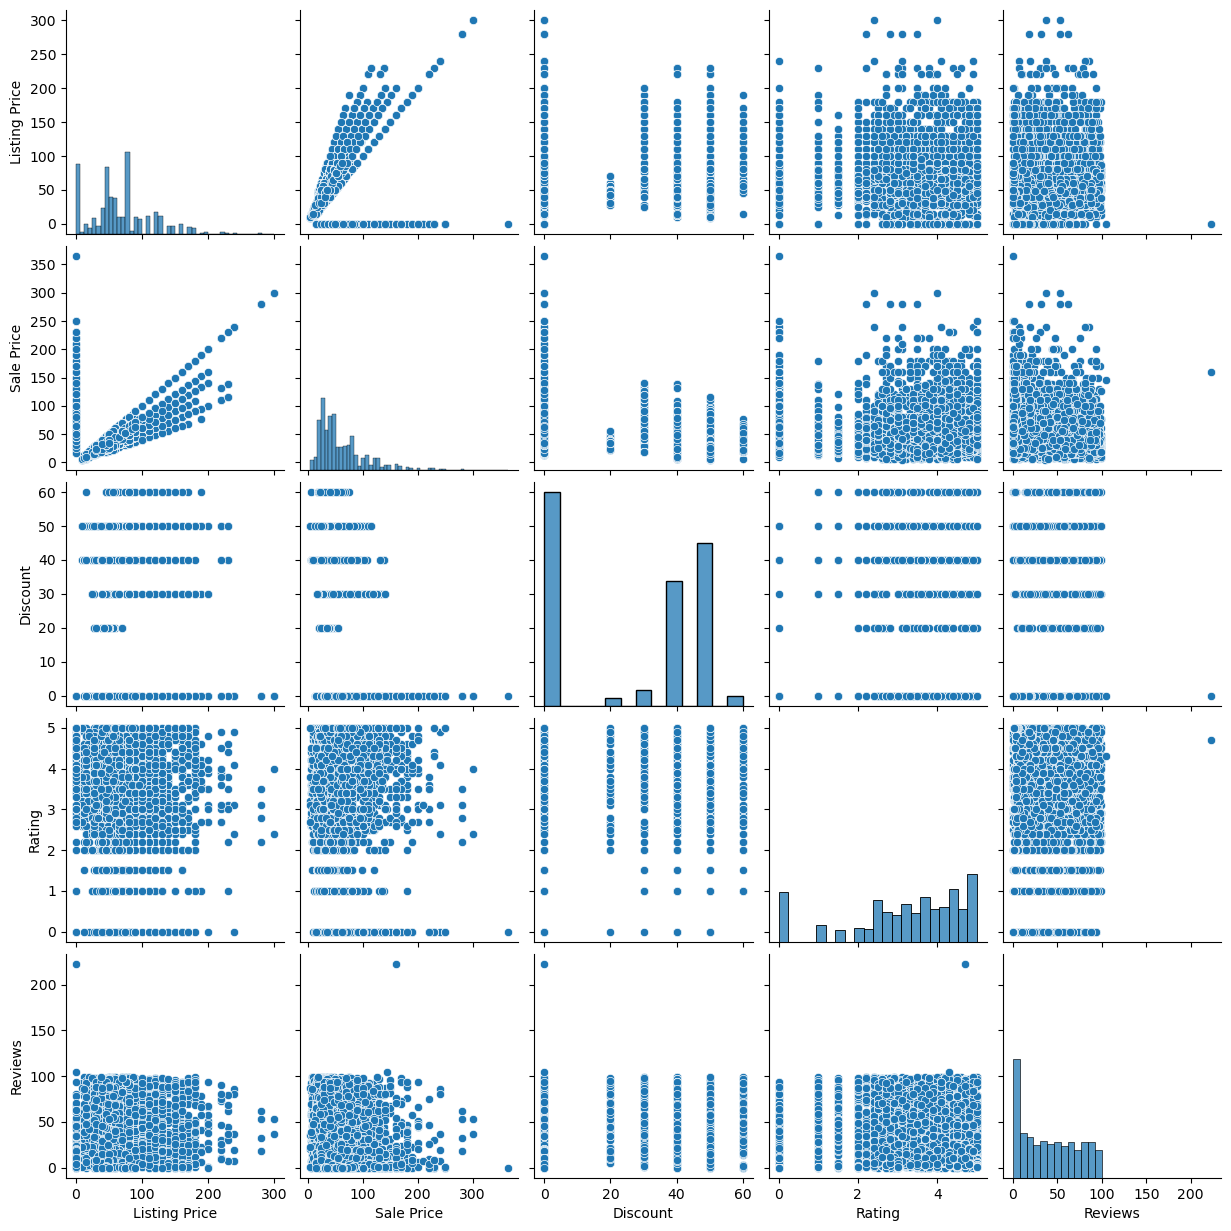

In [42]:
# Pair plot to compare all the numerical values
sns.pairplot(dataset)
plt.show()

In [43]:
# The clustering of the data was based on the Sale Price, Listing Price.


In [44]:
dataset.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,149.99,74.99,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,75.99,37.99,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,9.99,5.99,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,69.99,34.99,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,79.99,39.99,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [45]:
dataset.drop(['Product Name', 'Product ID', 'Brand', 'Description', 'Reviews', 'Last Visited'], axis=1, inplace=True)


In [46]:
X = dataset.iloc[:,0:4]
print(X)

      Listing Price  Sale Price  Discount  Rating
0            149.99       74.99        50     4.8
1             75.99       37.99        50     3.3
2              9.99        5.99        40     2.6
3             69.99       34.99        50     4.1
4             79.99       39.99        50     3.5
...             ...         ...       ...     ...
3263         159.95      127.97         0     5.0
3264          49.95       34.97         0     0.0
3265          84.95       59.47         0     5.0
3266           0.00      169.95         0     4.0
3267          89.95       62.97         0     0.0

[3268 rows x 4 columns]


In [47]:
# Scale the data

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

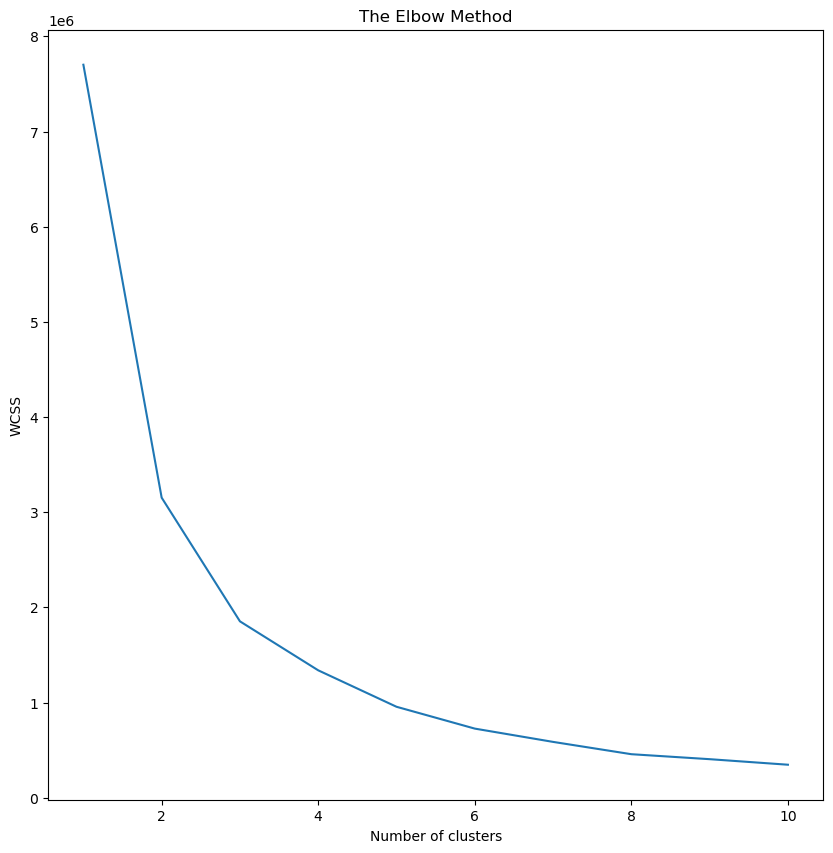

In [48]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# From the elbow method visualization the value of k is 3

In [50]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [51]:
# We need to reduce dimensionality before we can visualise

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.40806821, 0.29493049])

In [52]:
sum(pca.explained_variance_ratio_)

0.7029987035636649

In [53]:
# We can see that over 70% of the original variance is explained by the two dimensions we have retained in our data.

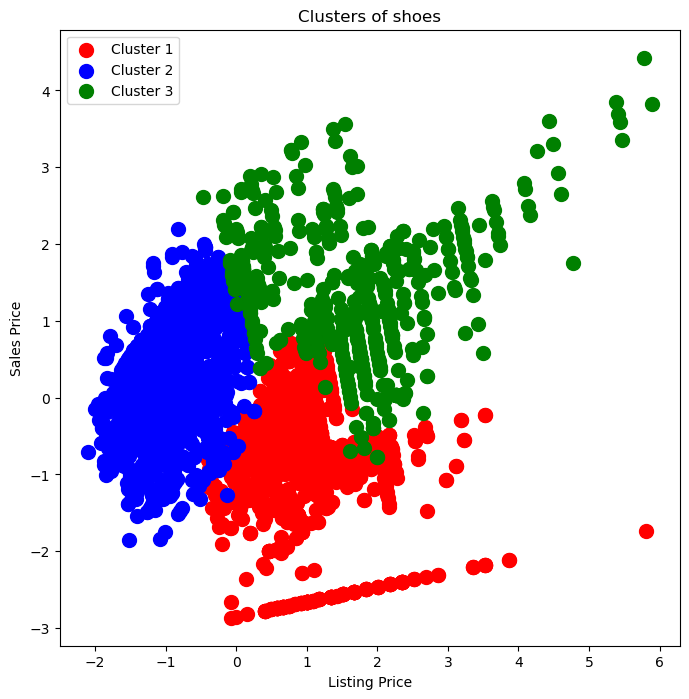

In [54]:
# Visualising the clusters

colours = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i,0], X_reduced[y_kmeans == i,1], 
                s = 100, c = colours[i] , label = 'Cluster '+str(i+1))
plt.title('Clusters of shoes')
plt.xlabel('Listing Price')
plt.ylabel('Sales Price')
plt.legend()
plt.show()

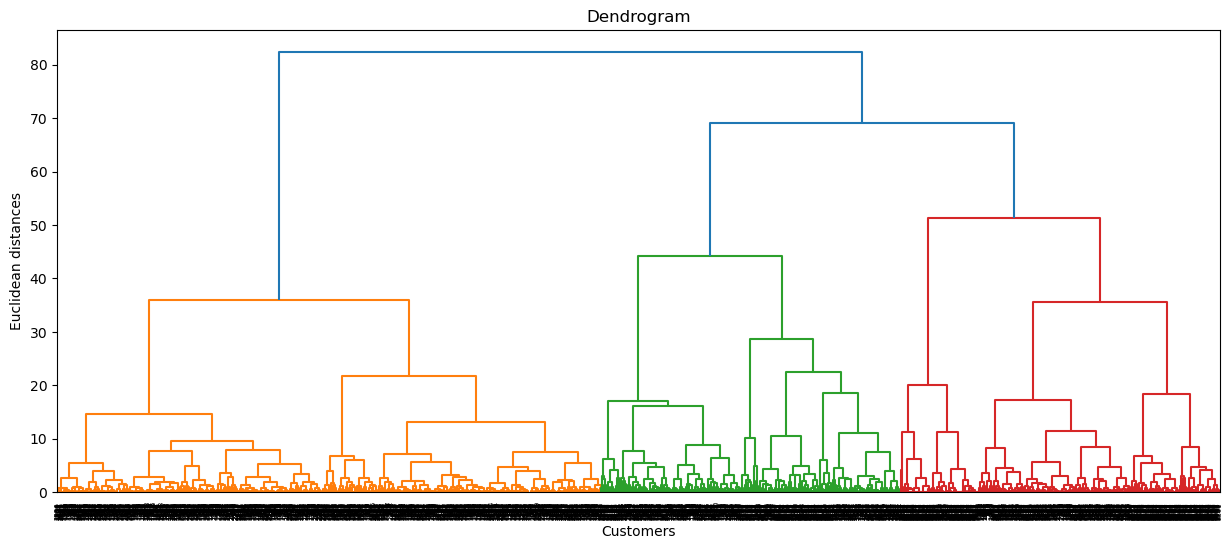

In [55]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [56]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [57]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [58]:
cluster_labels = kmeans.labels_

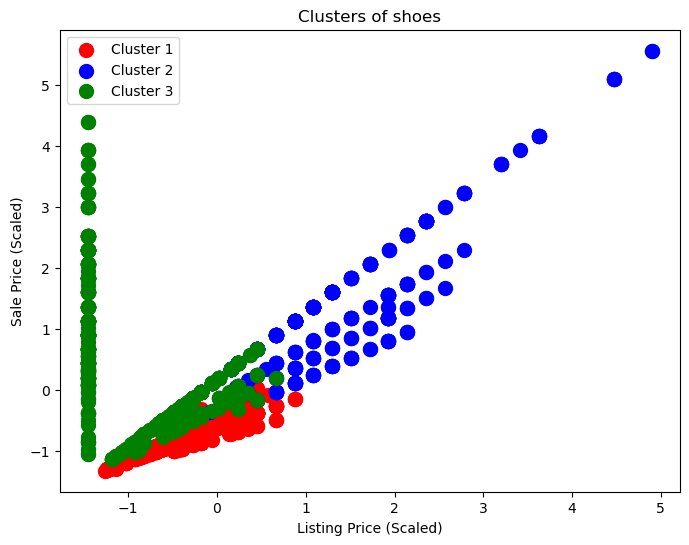

In [59]:
# Visualising the clusters
plt.figure(figsize=(8,6))
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1,0], X[y_hc== 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of shoes')
plt.xlabel('Listing Price (Scaled)')
plt.ylabel('Sale Price (Scaled)')
plt.legend()
plt.show()